# Lecture 5.2

* Load the **Concrete data** dataset from this repository
* Run EDA (including visualisation)
* Run k-means clustering
* Run multiple linear regression to predict concrete **compressive strength** on test subset and individual input

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [19]:
data_path = '../Datasets/concrete_data.csv'
concrete_df = pd.read_csv(data_path)

concrete_df.head()
# concrete_df.info()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


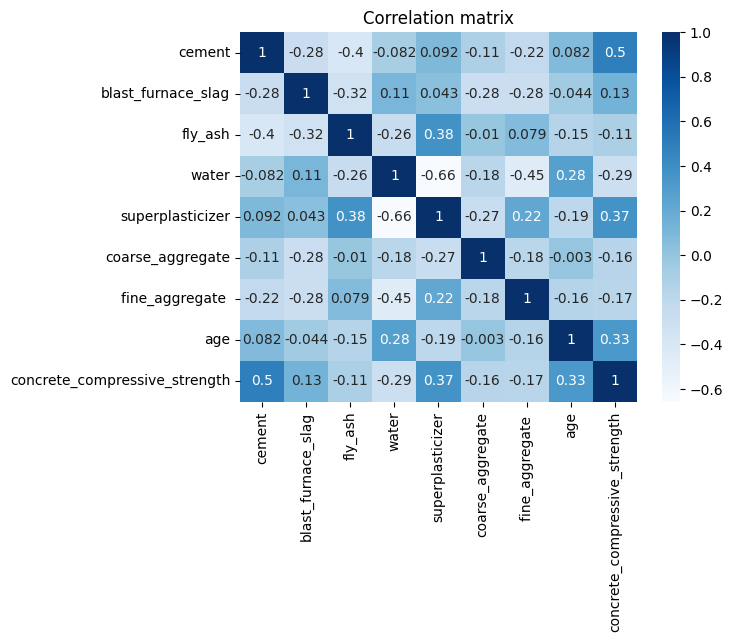

In [11]:
sns.heatmap(
    concrete_df.select_dtypes(include='number').corr(),
    cmap='Blues',
    annot=True    
)
plt.title("Correlation matrix")
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [17]:
inputs = concrete_df[['age']]
targets = concrete_df[['concrete_compressive_strength']]
print("inputs shape", inputs.shape)
print("targets shape", targets.shape)

inputs shape (1030, 1)
targets shape (1030, 1)


In [ ]:
model.fit(inputs, targets)

In [22]:
model.predict(np.array([
    [200],
    [15],
    [400]
]))

/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[49.24116566],
       [33.1511877 ],
       [66.63573644]])

In [24]:
predictions = model.predict(inputs)

In [80]:
X = concrete_df[['cement','concrete_compressive_strength','blast_furnace_slag','fly_ash','water','superplasticizer','coarse_aggregate','fine_aggregate ','age']]
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

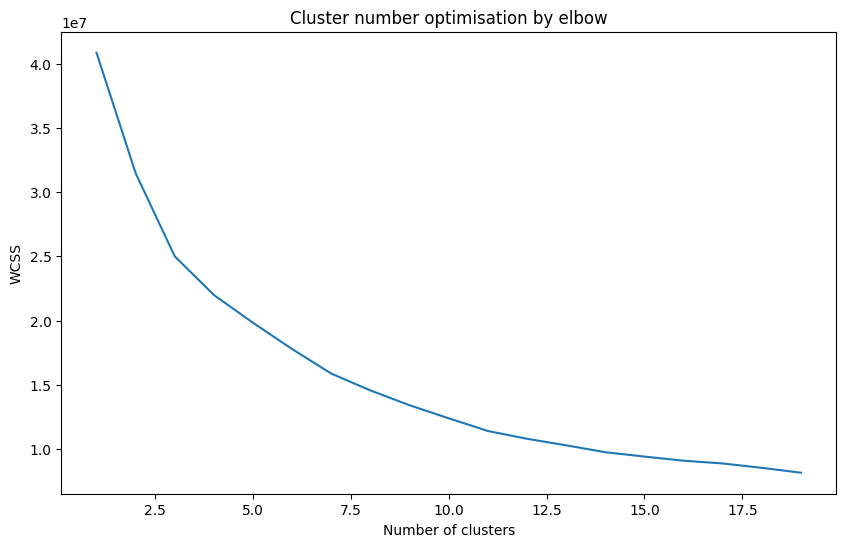

In [81]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Cluster number optimisation by elbow")
plt.show()

In [82]:
kmeans = KMeans(n_clusters=11, init='k-means++', max_iter=300, n_init=10, random_state=42)

In [83]:
type(kmeans)
y_kmeans = kmeans.fit_predict(X)
type(y_kmeans)
concrete_df['Cluster'] = y_kmeans

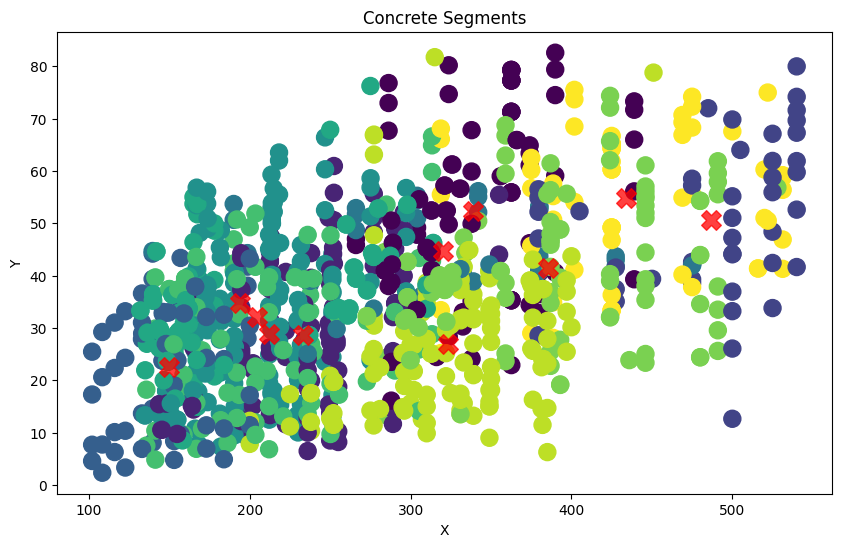

In [85]:
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_kmeans, s=150, cmap='viridis')  # review slicing through iterables; 0, 1 stands for columns
centers = kmeans.cluster_centers_  # Retrieves coordinates of cluster centers
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=.75, marker='X')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Concrete Segments")
plt.show()

In [74]:
avg_compressive_strength_in_cluster = concrete_df.groupby("Cluster")[["cement","concrete_compressive_strength"]].mean().sort_index()

avg_compressive_strength_in_cluster

,cement,concrete_compressive_strength
Cluster,,
0,232.124066,30.992780
1,384.364641,45.216575
2,489.196842,51.522632
3,160.107778,26.654296
4,306.124280,37.644979
